<a href="https://colab.research.google.com/github/poonamaswani/DataScienceAndAI/blob/main/CAM_DS_C101_Demo_4_1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**First things first** - please go to 'File' and select 'Save a copy in Drive' so that you have your own version of this activity set up and ready to use.
Remember to update the portfolio index link to your own work once completed!



```
# This is formatted as code
```

# Demonstration 4.1.3 Data cleaning: Missing values and imputations

The Titanic data set is often used to explain concepts in machine learning. The data set contains information about the passengers aboard the RMS Titanic, which tragically sank on its maiden voyage in 1912. It includes features like passenger age, sex, ticket class, fare paid, and survival status. This historical data set provides a rich and approachable introduction to data handling, feature engineering, and model building.

Follow the demonstration to see how to address **missing values** in the Titanic data set. In this demonstration, you will learn:
- the importance of exploratory data analysis (EDA)
- how to handle missing data using multiple techniques.

In [ ]:
# Import the required libraries.
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
# Import the identify_features.csv file (data set) from GitHub with a url.
url = "https://raw.githubusercontent.com/fourthrevlxd/cam_dsb/main/modified_titanic.csv"

# Read the CSV file into a new DataFrame.
titanic = pd.read_csv(url)

# Display the first few rows of the DataFrame.
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,Third,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,First,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,Third,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,First,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,Third,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# View the data set shape.
titanic.shape

(891, 12)

PassengerId is the unique ID of the row and doesn't have any effect on the target.

Survived is the target variable we are trying to predict (0 or 1):

1 = Survived

0 = Not Survived

Pclass is the ticket class:

1 = 1st - Upper Class

2 = 2nd - Middle Class

3 = 3rd - Lower Class

SibSp is the total number of siblings and spouse aboard the Titanic.

Parch is the total number of parents and children aboard the Titanic.

Ticket is the ticket number of the passenger.

Fare is the passenger fare.

Cabin is the cabin number of the passenger.

Embarked is port of embarkation and it is a categorical feature, which has 3 unique values:

C = Cherbourg

Q = Queenstown

S = Southampton

In [ ]:
# View labels.
label = titanic['Survived']

# View the unique values.
label.unique()

array([0, 1])

In [ ]:
# Find missing values.
titanic.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


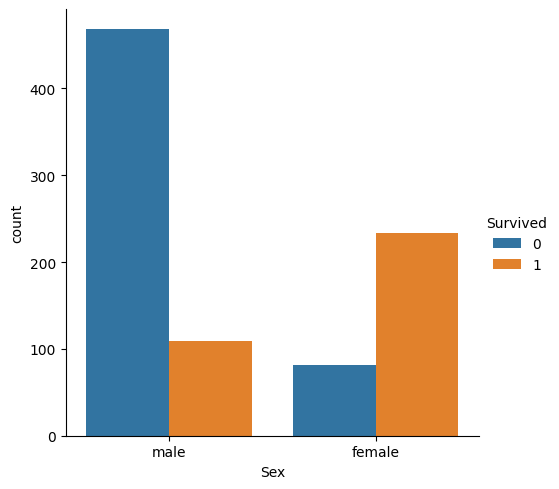

In [ ]:
# Visualise the data.
# Create a catplot.
sns.catplot(x ="Sex", hue ="Survived",
            kind ="count", data = titanic)

We have two broad strategies in handling missing values:

1. Fill in the missing values using various techniques.

2. Remove the column or feature having missing values.

In [ ]:
# Replace missing 'Age' values with the median.
titanic['NewAge'] = titanic['Age']
titanic['NewAge'] = titanic['NewAge'].fillna(titanic['NewAge'].median())

# View the DataFrame.
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NewAge
0,1,0,Third,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0
1,2,1,First,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0
2,3,1,Third,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0
3,4,1,First,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0
4,5,0,Third,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0


In [ ]:
# Determine the median age, grouped by 'Sex' and 'Pclass.
age_by_pclass_sex = titanic.groupby(['Sex', 'Pclass'])['Age'].median()

In [ ]:
for Pclass in titanic['Pclass'].unique():
    for Sex in ['female', 'male']:
        print('Median age of Pclass {} {}s: {}'.format(Pclass, Sex, age_by_pclass_sex[Sex][Pclass]))
print('Median age of all passengers: {}'.format(titanic['Age'].median()))

Median age of Pclass Third females: 21.5
Median age of Pclass Third males: 25.0
Median age of Pclass First females: 35.0
Median age of Pclass First males: 40.0
Median age of Pclass Second females: 28.0
Median age of Pclass Second males: 30.0
Median age of all passengers: 28.0


In [ ]:
# Fill the missing values in Age with the medians of Sex and Pclass groups.
titanic['Age'] = titanic.groupby(['Sex', 'Pclass'], group_keys=False)['Age'].apply(lambda x: x.fillna(x.median()))

In [ ]:
# View the age per class.
print(age_by_pclass_sex)

Sex     Pclass
female  First     35.0
        Second    28.0
        Third     21.5
male    First     40.0
        Second    30.0
        Third     25.0
Name: Age, dtype: float64


In [ ]:
# Find the missing values - age no longer has any missing values.
titanic.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
# Re-visit the embarked feature.
titanic[titanic['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NewAge
61,62,1,First,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,38.0
829,830,1,First,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,62.0


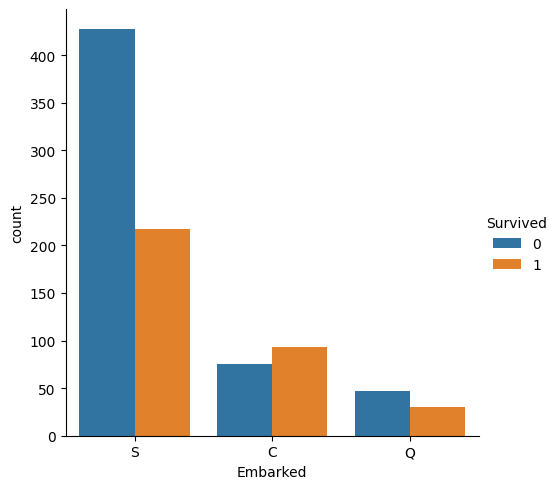

In [ ]:
# Create a catplot.
sns.catplot(x ='Embarked', hue ='Survived',
            kind ='count', data = titanic)

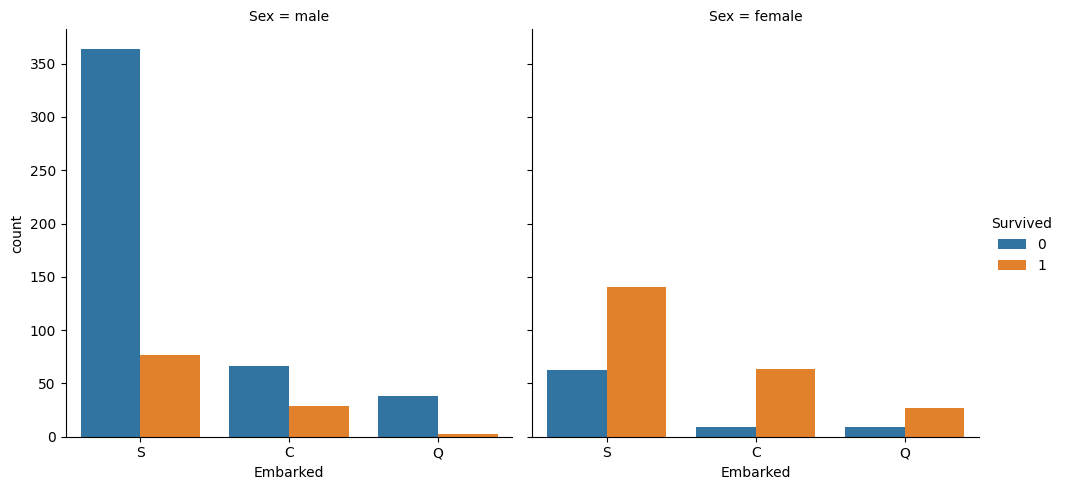

In [ ]:
# Create a second catplot.
sns.catplot(x ='Embarked', hue ='Survived',
            kind ='count', col = "Sex",
            data = titanic)

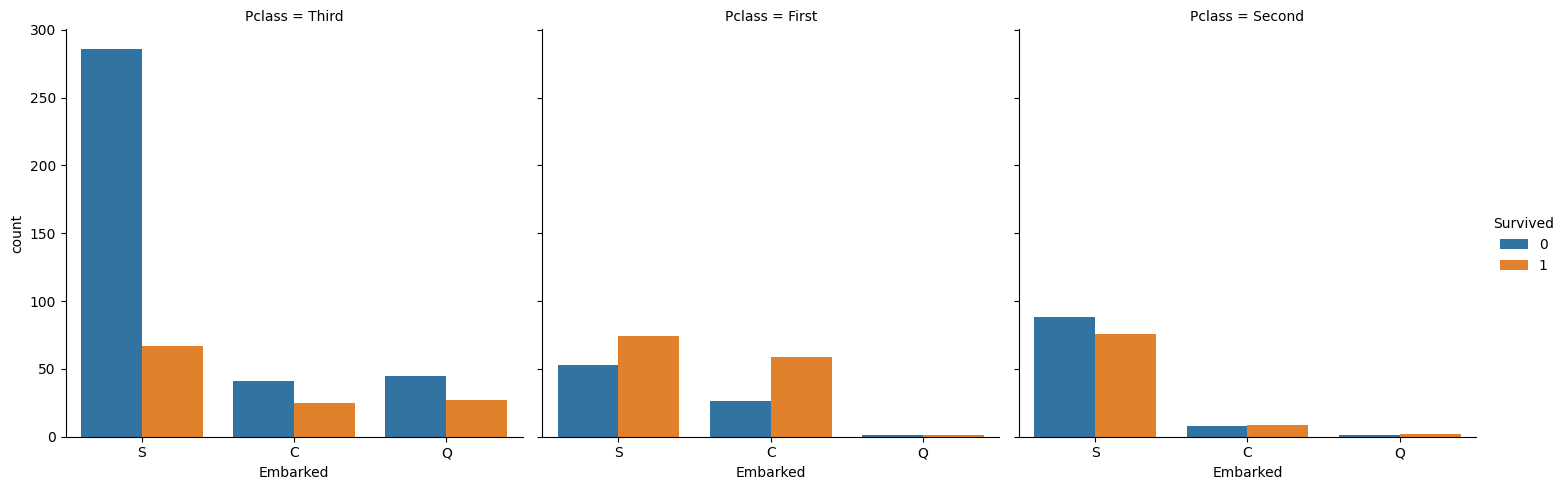

In [ ]:
# Create a third catplot.
sns.catplot(x ='Embarked', hue ='Survived',
            kind ='count', col ='Pclass',
            data = titanic)

In [ ]:
# Filter the DataFrame for first class female passengers who survived
first_class_females_survived = titanic[(titanic['Pclass'] == 'First') &
                                       (titanic['Sex'] == 'female') &
                                       (titanic['Survived'] == 1)]

# Get the count distribution of 'Embarked'
embarked_distribution = first_class_females_survived['Embarked'].value_counts()

print(embarked_distribution)

Embarked
S    46
C    42
Q     1
Name: count, dtype: int64


In [ ]:
# Since the count values for Queenstown and Southampton are both very similar, we would need more information to adequately impute the data. As such, we will remove these two rows from our exploration.
titanic = titanic.dropna(subset=['Embarked'])

In [ ]:
# Drop features that are not needed.
titanic = titanic.drop(columns=['PassengerId','Name','Ticket','Cabin','NewAge'])

# View the DataFrame.
print(titanic.shape)
titanic.head()

(889, 8)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,Third,male,22.0,1,0,7.2500,S
1,1,First,female,38.0,1,0,71.2833,C
2,1,Third,female,26.0,0,0,7.9250,S
3,1,First,female,35.0,1,0,53.1000,S
4,0,Third,male,35.0,0,0,8.0500,S


### Key information
This demonstration illustrated the importance of understanding the business context when handling missing values. Before you can ignore, replace, or delete missing values, consider:
- Are the missing values a result of data errors?
- Are the missing values isolated incidents, and can the incidents be repeated?

## Reflect
What are the practical applications of this technique?

> Select the pen from the toolbar to add your entry.